# CodeLabs Academy Technical Challange

In [ ]:
#install some packages if not already installed
!pip install pandas
!pip install seaborn 
!pip install contractions
!pip install textblob

In [1]:
# Import the libraries required for performing EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


## Exploratory Data Analysis (EDA)

### Download dataset

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz
!tar -xvf /content/yelp_review_full_csv.tgz 

### Reading Data

In [2]:
# Read the data from csv files as Pandas DataFrame
df_train = pd.read_csv('yelp_review_full_csv/train.csv', header = None)
df_test = pd.read_csv('yelp_review_full_csv/test.csv', header = None)

In [3]:
# Let's look at the general structure of the dataset over the first few rows.
df_train.head()

,0,1
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


In [4]:
# As seen above, there is no header in the dataset. So lets add a header for each column and look at again. 
df_train.columns = ["Star", "Review"]
df_test.columns = ["Star", "Review"]
df_train.head()

,Star,Review
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


### Adding new column 
There are two columns in the dataset, which are Star and Review. Before performing EDA in detail, I would like to add another column that contains the number of words in the reviews 

In [5]:
# Count the number of words in the reviews and add as a new column for the train dataset
count_train = df_train.iloc[:,1].str.split().str.len()
df_train['word_count'] = count_train.values
df_train.head()

,Star,Review,word_count
0,5,dr. goldberg offers everything i look for in a...,93
1,2,"Unfortunately, the frustration of being Dr. Go...",115
2,4,Been going to Dr. Goldberg for over 10 years. ...,97
3,4,Got a letter in the mail last week that said D...,53
4,1,I don't know what Dr. Goldberg was like before...,211


In [6]:
# Similarly, perform the same operation for the test dataset
count_test = df_test.iloc[:,1].str.split().str.len()
df_test['word_count'] = count_test.values
df_test.head()


,Star,Review,word_count
0,1,I got 'new' tires from them and within two wee...,151
1,1,Don't waste your time. We had two different p...,39
2,1,All I can say is the worst! We were the only 2...,178
3,1,I have been to this restaurant twice and was d...,223
4,1,Food was NOT GOOD at all! My husband & I ate h...,168


### Descriptive statistics

In [17]:
# Look at descriptive statistic parameters for the enhanced dataset
df_train.describe(include='all')

,Star,Review,word_count
count,650000.000000,650000,650000.000000
unique,NaN,650000,NaN
top,NaN,A beach club is where you go to be seen. It's ...,NaN
freq,NaN,1,NaN
mean,3.000000,NaN,134.098089
std,1.414215,NaN,121.396115
min,1.000000,NaN,1.000000
25%,2.000000,NaN,52.000000
50%,3.000000,NaN,99.000000
75%,4.000000,NaN,175.000000


In [18]:
df_test.describe(include='all')

,Star,Review,word_count
count,50000.000000,50000,50000.000000
unique,NaN,50000,NaN
top,NaN,Going to Padre Murphy's on Fridays for Fish an...,NaN
freq,NaN,1,NaN
mean,3.000000,NaN,134.290980
std,1.414228,NaN,121.246345
min,1.000000,NaN,1.000000
25%,2.000000,NaN,53.000000
50%,3.000000,NaN,99.000000
75%,4.000000,NaN,176.000000


In [19]:
# check for missing values in the dataset
print(df_train.isnull().shttp://localhost:8888/notebooks/Technical_Challenge.ipynb#Visual-Representationum())
print(df_test.isnull().sum())

Star          0
Review        0
word_count    0
dtype: int64
Star          0
Review        0
word_count    0
dtype: int64


### Visual Representation

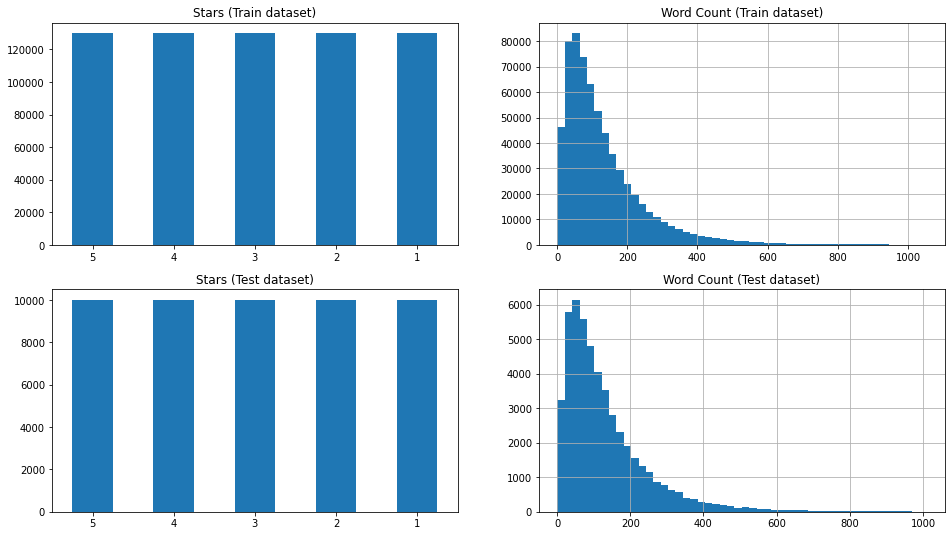

In [20]:
plt.subplot(221)
df_train['Star'].value_counts().plot(kind='bar', title='Stars (Train dataset)', figsize=(16,9)) 
plt.xticks(rotation=0)
plt.subplot(222)
df_train['word_count'].hist(bins=50)
plt.title('Word Count (Train dataset)')
plt.subplot(223)
df_test['Star'].value_counts().plot(kind='bar', title='Stars (Test dataset)', figsize=(16,9)) 
plt.xticks(rotation=0)
plt.subplot(224)
df_test['word_count'].hist(bins=50)
plt.title('Word Count (Test dataset)')
plt.show()

<AxesSubplot:>

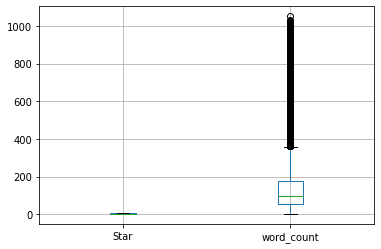

In [21]:
df_train.boxplot()

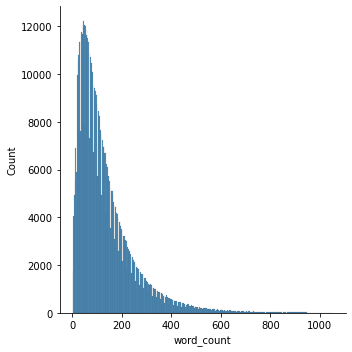

In [22]:
# An alternative way of plotting histogram 
sns.displot(df_train['word_count'])

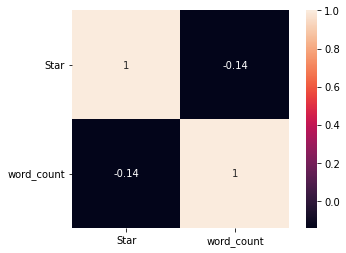

In [23]:
# Lets investigate if there is any correlation between star column and word_count column. 
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()
#The heatmap below indicates that there is no correlation between star column and word_count column 
# as the correlatlon coefficient is -0.14.   

## Text Classification using Deep Learning 

### Data Preprocessing
Why are we doing this? We will use word embeddings (word2vec) to encode text-based words into numbers. This is necessary because ML/DL algorithms perform their mathematical operations on numbers rather than text. Pre-trained word embeddings usually clean their text dataset from special characters, punctuation and numbers before generating corresponding embeddings. Therefore, we perform similar operations on our dataset to match perfectly with  embeddings.  

In [7]:
# Step-1: Cleaning special characters, punctuation and new line symbols
# We can use regex for this purpose
import re
def clean_text(x):
    pattern = '[^a-zA-z0-9 ]+'
    text = re.sub(pattern, '', x)
    text = text.replace("\\n", "") # removes new line with double backslashes
    text = text.replace("\\", "") # removes double backslashes
    return text

In [8]:
#Lets test it on the first review of the test dataset. First print the original text
df_test['Review'].iloc[0:1].values[0]

'I got \'new\' tires from them and within two weeks got a flat. I took my car to a local mechanic to see if i could get the hole patched, but they said the reason I had a flat was because the previous patch had blown - WAIT, WHAT? I just got the tire and never needed to have it patched? This was supposed to be a new tire. \\nI took the tire over to Flynn\'s and they told me that someone punctured my tire, then tried to patch it. So there are resentful tire slashers? I find that very unlikely. After arguing with the guy and telling him that his logic was far fetched he said he\'d give me a new tire \\"this time\\". \\nI will never go back to Flynn\'s b/c of the way this guy treated me and the simple fact that they gave me a used tire!'

In [9]:
# and the cleaned version
clean_text(df_test['Review'].iloc[0:1].values[0])

'I got new tires from them and within two weeks got a flat I took my car to a local mechanic to see if i could get the hole patched but they said the reason I had a flat was because the previous patch had blown  WAIT WHAT I just got the tire and never needed to have it patched This was supposed to be a new tire I took the tire over to Flynns and they told me that someone punctured my tire then tried to patch it So there are resentful tire slashers I find that very unlikely After arguing with the guy and telling him that his logic was far fetched he said hed give me a new tire this time I will never go back to Flynns bc of the way this guy treated me and the simple fact that they gave me a used tire'

In [10]:
# Step-2: Cleaning Numbers
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub(r"\d+", "#", str(x)) 
    return x

In [11]:
#Lets test it.
cleaned = clean_numbers('I am 35 years old. My cars plate number is 34 AGL 4576. Date is April 23 2022.')
print(cleaned)

I am # years old. My cars plate number is # AGL #. Date is April # #.


In [12]:
# Step-3: Expand Contractions
import contractions
text = "this's a text with contraction"
print(text)
print(contractions.fix(text))


this's a text with contraction
this is a text with contraction


In [13]:
# Step-4: Convert all uppercase characters to lowercase
def to_lower(text):
    return text.lower()


In [31]:
# (Optional) Step-5: Spell correction. We will not apply this for now.  
from textblob import TextBlob

def correct_sentence_spelling(sentence):
    sentence = TextBlob(sentence)
    result = sentence.correct()
    return str(result)

In [32]:
corrected = correct_sentence_spelling('this is a test senntence. I like applle andd bananana ')
str(corrected)

'this is a test sentence. I like apple and banana '

Generate a cleaned version of the dataset by performing the above operations and save it. Note that using map is much more faster than iterating over rows when applying a function over whole column.    

In [14]:
df_train_cleaned = df_train.copy()
df_train_cleaned['Review'] = df_train_cleaned['Review'].map(lambda Review: clean_text(Review))
df_train_cleaned['Review'] = df_train_cleaned['Review'].map(lambda Review: clean_numbers(Review))
df_train_cleaned['Review'] = df_train_cleaned['Review'].map(lambda Review: contractions.fix(Review))
df_train_cleaned['Review'] = df_train_cleaned['Review'].map(lambda Review: to_lower(Review))

del df_train_cleaned['word_count']  # we dont need this columns anymore  
df_train_cleaned.to_csv('train_cleaned.csv')

In [15]:
df_test_cleaned = df_test.copy()
df_test_cleaned['Review'] = df_test_cleaned['Review'].map(lambda Review: clean_text(Review))
df_test_cleaned['Review'] = df_test_cleaned['Review'].map(lambda Review: clean_numbers(Review))
df_test_cleaned['Review'] = df_test_cleaned['Review'].map(lambda Review: contractions.fix(Review))
df_test_cleaned['Review'] = df_test_cleaned['Review'].map(lambda Review: to_lower(Review))

del df_test_cleaned['word_count']  # we dont need this columns anymore  
df_test_cleaned.to_csv('test_cleaned.csv')

In [16]:
# just check the cleaned version
df_train_cleaned.tail()

,Star,Review
649995,5,i had a sprinkler that was gushing pipe broken...
649996,1,phone calls always go to voicemail and message...
649997,1,looks like all of the good reviews have gone t...
649998,5,i was able to once again rely on yelp to provi...
649999,1,i have been using this company for # months r...


In [17]:
df_test_cleaned.head()

,Star,Review
0,1,i got new tires from them and within two weeks...
1,1,do not waste your time we had two different p...
2,1,all i can say is the worst we were the only # ...
3,1,i have been to this restaurant twice and was d...
4,1,food was not good at all my husband i ate her...


### To skip the above-mentioned data preprocessing steps, we can read cleaned data from the disk. 
df_train_cleaned = pd.read_csv('train_cleaned.csv')
df_train_cleaned = df_train_cleaned[['Star', 'Review']]
df_test_cleaned = pd.read_csv('test_cleaned.csv')
df_test_cleaned = df_test_cleaned[['Star', 'Review']]

## Tokenization

In [122]:
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf
from tensorflow import keras

sequence_length=60
vectorizer = TextVectorization(max_tokens=40000, output_sequence_length=sequence_length)
text_ds = tf.data.Dataset.from_tensor_slices(df_train_cleaned['Review']).batch(8) 
vectorizer.adapt(text_ds)

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

print(voc[0:10])
print(len(voc))

['', '[UNK]', 'the', 'and', 'i', 'a', 'to', 'was', 'of', 'not']
40000


In [ ]:
#Download Glove if not already done
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [123]:
import os

path_to_glove_file = os.path.join("glove.6B.50d.txt")
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [124]:
num_tokens = len(voc) + 2
embedding_dim = 50 
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted {} words ({} misses)".format(hits, misses))

Converted 31236 words (8764 misses)


## Neural Network

In [125]:
from keras.layers import *
from keras.models import *
from keras import backend as K

In [127]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)


In [128]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [130]:
x_test = vectorizer(np.array([[s] for s in df_test_cleaned['Review']])).numpy()

In [131]:
# Due to memory limitation, we vectorize train data part by part in loop
x_train = []
step = 10000
for i in range(0,df_train_cleaned['Review'].size,step):
    if i%100000 == 0:
        print(i)
    vector = vectorizer(np.array([[s] for s in df_train_cleaned['Review'].iloc[i:i+step]])).numpy()
    x_train.append(vector)
x_train = np.array(x_train).reshape(df_train_cleaned['Review'].size,sequence_length)

0
100000
200000
300000
400000
500000
600000


In [132]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

train_set_labels = np.array(df_train_cleaned['Star'])
test_set_labels = np.array(df_test_cleaned['Star'])
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_set_labels)
train_y_onehot = to_categorical(train_y)
test_y = label_encoder.fit_transform(test_set_labels)
test_y_onehot = to_categorical(test_y)

In [134]:
train_y_onehot[0:5]

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [135]:
x_train.shape,train_y_onehot.shape,x_test.shape,test_y_onehot.shape

((650000, 60), (650000, 5), (50000, 60), (50000, 5))

## Model-1

In [129]:
from tensorflow.keras import layers
class_number = 5

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, return_sequences=True, recurrent_dropout=0.2))(embedded_sequences)
x = layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, recurrent_dropout=0.2))(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(class_number, activation="softmax")(x)
model = keras.Model(inputs=int_sequences_input, outputs = x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 50)          2000100   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         58880     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 2,174,953
Trainable params: 174,853
Non-trainable params: 2,000,100
___________________________________________

In [133]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [136]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
history = model.fit(x_train, train_y_onehot, batch_size=128, epochs=10,validation_data=(x_test,test_y_onehot),callbacks=[callback],verbose=1)
model.save("TextClassifier_20220424_v0")

Epoch 1/10
5079/5079 [==============================] - 690s 135ms/step - loss: 1.2303 - acc: 0.4602 - val_loss: 1.1320 - val_acc: 0.5054
Epoch 2/10
5079/5079 [==============================] - 678s 134ms/step - loss: 1.1255 - acc: 0.5080 - val_loss: 1.0820 - val_acc: 0.5280
Epoch 3/10
5079/5079 [==============================] - 686s 135ms/step - loss: 1.0863 - acc: 0.5254 - val_loss: 1.0531 - val_acc: 0.5415
Epoch 4/10
5079/5079 [==============================] - 692s 136ms/step - loss: 1.0630 - acc: 0.5360 - val_loss: 1.0439 - val_acc: 0.5416
Epoch 5/10
5079/5079 [==============================] - 699s 138ms/step - loss: 1.0466 - acc: 0.5426 - val_loss: 1.0291 - val_acc: 0.5514
Epoch 6/10
5079/5079 [==============================] - 795s 157ms/step - loss: 1.0344 - acc: 0.5487 - val_loss: 1.0215 - val_acc: 0.5534
Epoch 7/10
5079/5079 [==============================] - 821s 162ms/step - loss: 1.0243 - acc: 0.5526 - val_loss: 1.0125 - val_acc: 0.5565
Epoch 8/10
5079/5079 [============

Text(0.5, 0, 'epoch')

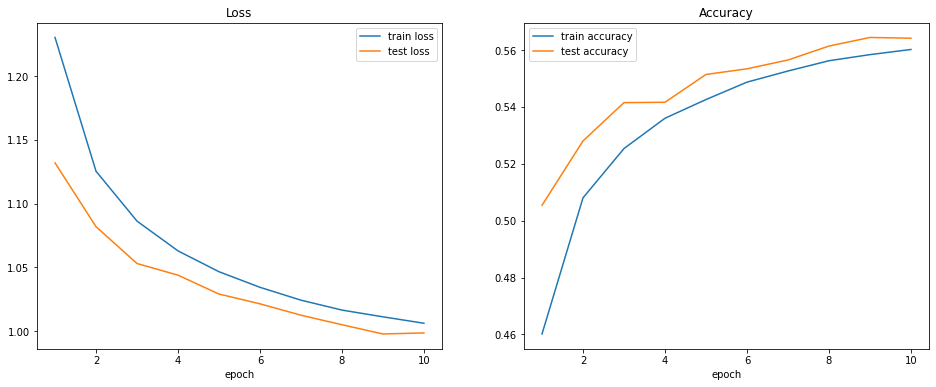

In [175]:
# visualizing losses and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(1,11)

plt.figure(figsize = (16,6))
plt.subplot(121)
plt.plot(xc, train_loss, label='train loss')
plt.plot(xc, val_loss, label='test loss')
plt.legend()
plt.title('Loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(xc, train_acc, label='train accuracy')
plt.plot(xc, val_acc, label='test accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('epoch')

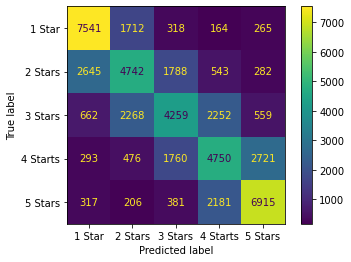

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
prediction = model.predict(x_test)
y_classes = prediction.argmax(axis=-1)
cm = confusion_matrix(test_y, y_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1 Star','2 Stars','3 Stars', '4 Starts', '5 Stars'])
cmd.plot()

## Model 2 

We make regression in this model rather than classification while keeping all other parameters the same.  

In [172]:
from tensorflow.keras import layers
class_number = 1

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, return_sequences=True, recurrent_dropout=0.2))(embedded_sequences)
x = layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, recurrent_dropout=0.2))(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(class_number, activation="linear")(x)
model2 = keras.Model(inputs=int_sequences_input, outputs = x)
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 50)          2000100   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         58880     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 2,174,437
Trainable params: 174,337
Non-trainable params: 2,000,100
___________________________________________

In [173]:
model2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
history2 = model2.fit(x_train, train_y, batch_size=128, epochs=10,validation_data=(x_test,test_y),callbacks=[callback],verbose=1)
model2.save("TextClassifier_model2")

Epoch 1/10
5079/5079 [==============================] - 713s 139ms/step - loss: 1.0919 - mse: 1.0919 - val_loss: 0.9090 - val_mse: 0.9090
Epoch 2/10
5079/5079 [==============================] - 722s 142ms/step - loss: 0.9042 - mse: 0.9042 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 3/10
5079/5079 [==============================] - 719s 142ms/step - loss: 0.8394 - mse: 0.8394 - val_loss: 0.7763 - val_mse: 0.7763
Epoch 4/10
5079/5079 [==============================] - 686s 135ms/step - loss: 0.8013 - mse: 0.8013 - val_loss: 0.7593 - val_mse: 0.7593
Epoch 5/10
5079/5079 [==============================] - 699s 138ms/step - loss: 0.7733 - mse: 0.7733 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 6/10
5079/5079 [==============================] - 686s 135ms/step - loss: 0.7524 - mse: 0.7524 - val_loss: 0.7174 - val_mse: 0.7174
Epoch 7/10
5079/5079 [==============================] - 686s 135ms/step - loss: 0.7360 - mse: 0.7360 - val_loss: 0.7054 - val_mse: 0.7054
Epoch 8/10
5079/5079 [============

Text(0.5, 0, 'epoch')

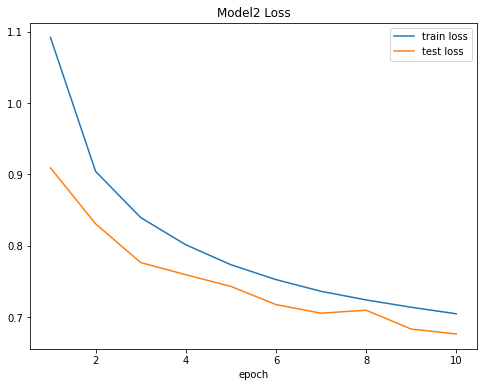

In [178]:
# visualizing losses and accuracy
train_loss = history2.history['loss']
val_loss   = history2.history['val_loss']
xc         = range(1,11)

plt.figure(figsize = (8,6))
plt.plot(xc, train_loss, label='train loss')
plt.plot(xc, val_loss, label='test loss')
plt.legend()
plt.title('Model2 Loss')
plt.xlabel('epoch')

In [184]:
prediction = model2.predict(x_test)

In [186]:
prediction = np.array(prediction)
print(prediction)

[[0.49319974]
 [0.02997336]
 [0.13346753]
 ...
 [2.8586879 ]
 [0.21140161]
 [1.9131997 ]]


In [202]:
prediction_rounded = np.round(prediction)
prediction_rounded = prediction_rounded.astype(int)
prediction_rounded = np.clip(prediction_rounded,0,4,out=prediction_rounded)
print(prediction_rounded)

[[0]
 [0]
 [0]
 ...
 [3]
 [0]
 [2]]


In [200]:
test_y

array([0, 0, 0, ..., 3, 1, 0])

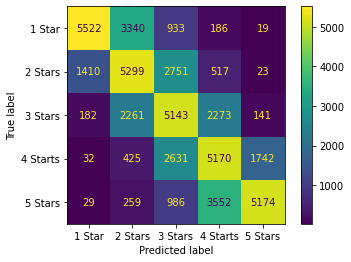

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, prediction_rounded)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1 Star','2 Stars','3 Stars', '4 Starts', '5 Stars'])
cmd.plot()

In [207]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y,prediction_rounded,normalize=True,sample_weight=None)
print("Model 2 accuracy: ",accuracy*100, '%')

Model 2 accuracy:  52.616 %
